# Maching Learning Bird Species classification Using Bones Structure and Measurements

**Understanding and classifying different species of birds based on bone measurements is a fascinating area of research that holds significant value in various fields such as ecology, ornithology, and conservation. By examining the relationships between bone sizes and ecological groups, we can gain insights into the physical adaptations and living habits of birds. In this notebook, our primary goal is to develop a machine learning-based classification model that accurately identifies the ecological groups of birds using their bone measurements. By achieving this, we can contribute to the broader understanding of avian diversity and provide a valuable tool for species identification and conservation efforts. To accomplish this task, we will explore a comprehensive dataset called 'Birds' Bones and Living Habits,' which contains measurements of various bird species, and employ a range of data preprocessing techniques, exploratory data analysis, and machine learning algorithms.**

## Dataset
The dataset used in this analysis is called 'Birds' Bones and Living Habits.' It is a comprehensive collection of bone measurements of various bird species, with a focus on their living habits and ecological groups. The dataset contains 420 birds, each represented by 10 continuous float measurements, including the length and diameter of the humerus, ulna, femur, tibiotarsus, and tarsometatarsus. These measurements reflect the sizes and shapes of different bones, which are influenced by the birds' living environments and habits.

The birds in the dataset are classified into six ecological groups, namely Swimming Birds, Wading Birds, Terrestrial Birds, Raptors, Scansorial Birds, and Singing Birds. Each bird is labeled with its respective ecological group, allowing us to associate the bone measurements with specific bird groups. It is worth noting that this dataset represents a subset of the broader classification of bird ecological groups, focusing specifically on these six groups.

In addition to the ecological group labels, the dataset provides information about the orders, genera, and species to which the birds belong. The bones in the dataset are part of the collection of the Natural History Museum of Los Angeles County and encompass a diverse range of species, with representation from 21 orders, 153 genera, and 245 species.

By leveraging this dataset, we aim to explore the relationships between bone measurements and ecological groups, enabling us to develop a classification model capable of predicting the ecological group of a bird based on its bone measurements. This analysis can provide valuable insights into the physical characteristics and adaptations of different bird species, ultimately contributing to our understanding of avian diversity and the factors influencing their living habits.

# **Methodology**


# 1. Data Collection and Description
The first step in our methodology was to acquire the "Birds' Bones and Living Habits" dataset, which contains bone measurements and corresponding ecological group labels of 420 bird samples. This dataset serves as the foundation for our avian species classification task.

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [49]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

# 2. Exploratory Data Analysis (EDA)

To gain insights into the dataset and understand its characteristics, we performed an extensive EDA. Here's why each step was essential:

**Shape and Description:** We examined the shape of the dataset to understand the number of samples and features. The describe() function provided us with descriptive statistics, such as mean, standard deviation, minimum, and maximum values, helping us understand the range and distribution of bone measurements.

In [3]:
bird = pd.read_csv(
    "bird.csv",
    dtype={"id": "str"}
)

bird.shape

(420, 12)

In [4]:
bird.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,419.000000,419.000000,417.000000,418.000000,418.000000,419.000000,418.000000,419.000000,419.000000,419.000000
mean,64.650501,4.370573,69.115372,3.597249,36.872416,3.220883,64.662823,3.182339,39.229976,2.930024
std,53.834549,2.854617,58.784775,2.186747,19.979082,2.023581,37.838145,2.080827,23.184313,2.185673
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,25.170000,2.190000,28.050000,1.870000,21.297500,1.715000,36.417500,1.565000,23.035000,1.425000
50%,44.180000,3.500000,43.710000,2.945000,31.130000,2.520000,52.120000,2.490000,31.740000,2.230000
75%,90.310000,5.810000,97.520000,4.770000,47.120000,4.135000,82.870000,4.255000,50.250000,3.500000
max,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


**Class Distribution:** Analyzing the class distribution allowed us to determine the representation of different ecological groups in our dataset. This step was crucial for assessing potential class imbalance issues and understanding the challenges associated with species classification.

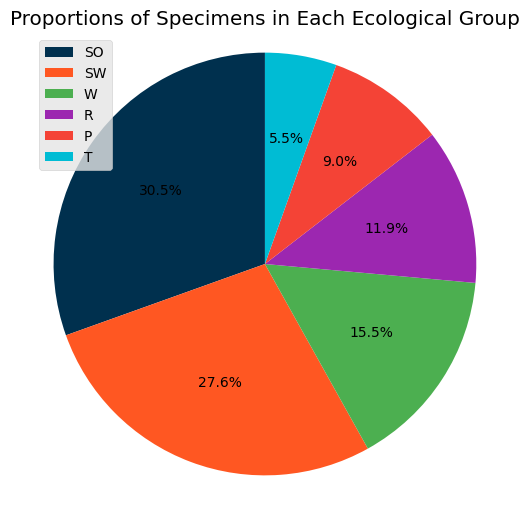

In [5]:
size_of_each_group = bird.groupby("type").size().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(6, 6))
colors = ["#00304e", "#ff5722", "#4caf50", "#9c27b0", "#f44336", "#00bcd4"]  # Add an additional color here.

# Plot the pie chart
wedges, texts, autotexts = ax.pie(size_of_each_group, colors=colors, autopct="%1.1f%%", startangle=90)

# Customize the plot
ax.set_title("Proportions of Specimens in Each Ecological Group")
ax.axis("equal")  # Ensure the pie chart is circular

# Add a legend
ax.legend(wedges, size_of_each_group.index, loc="best")

# Show the plot
plt.show()

**Andrew Curves:** Visualizing the bone measurements using Andrew Curves helped us explore the relationships and variations among the ecological groups. This visualization technique provided valuable insights into the distinct patterns exhibited by different avian species, contributing to our understanding of species-specific bone characteristics.

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False) # Do not centralize the features, keep them positive.

bird_raw = bird.copy() # Make a copy of original data.

feature_columns = ['huml', 'humw', 'ulnal', 'ulnaw', 'feml', 'femw', 'tibl', 'tibw', 'tarl', 'tarw'] # numeric feature columns.

bird[feature_columns] = scaler.fit_transform(bird_raw[feature_columns]) # standardlize the numeric features.

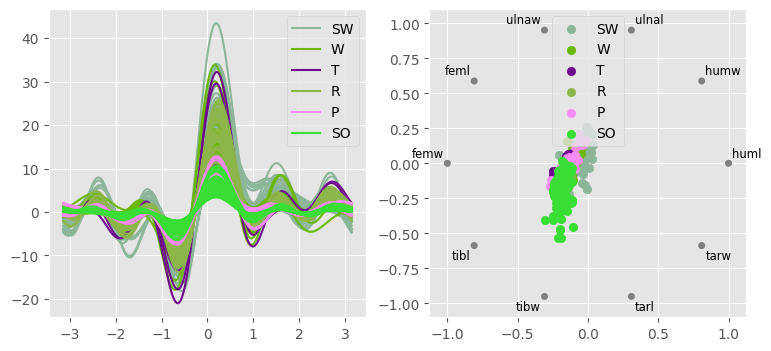

In [7]:
# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# Plot Andrews curves in the first subplot
pd.plotting.andrews_curves(bird[feature_columns+['type']], 'type', ax=ax[0])
ax[0].grid()

# Plot Radviz plot in the second subplot
pd.plotting.radviz(bird[feature_columns+['type']], 'type', ax=ax[1])

# Display the plot
plt.show()

**Correlation Matrix:** A correlation matrix helps to assess the linear relationships between different features in the dataset. By calculating the correlation coefficients between pairs of variables, we can identify potential dependencies or associations. The correlation matrix provides a comprehensive overview of these relationships, allowing us to understand which features might be highly correlated and which ones are less correlated. This information is valuable for feature s

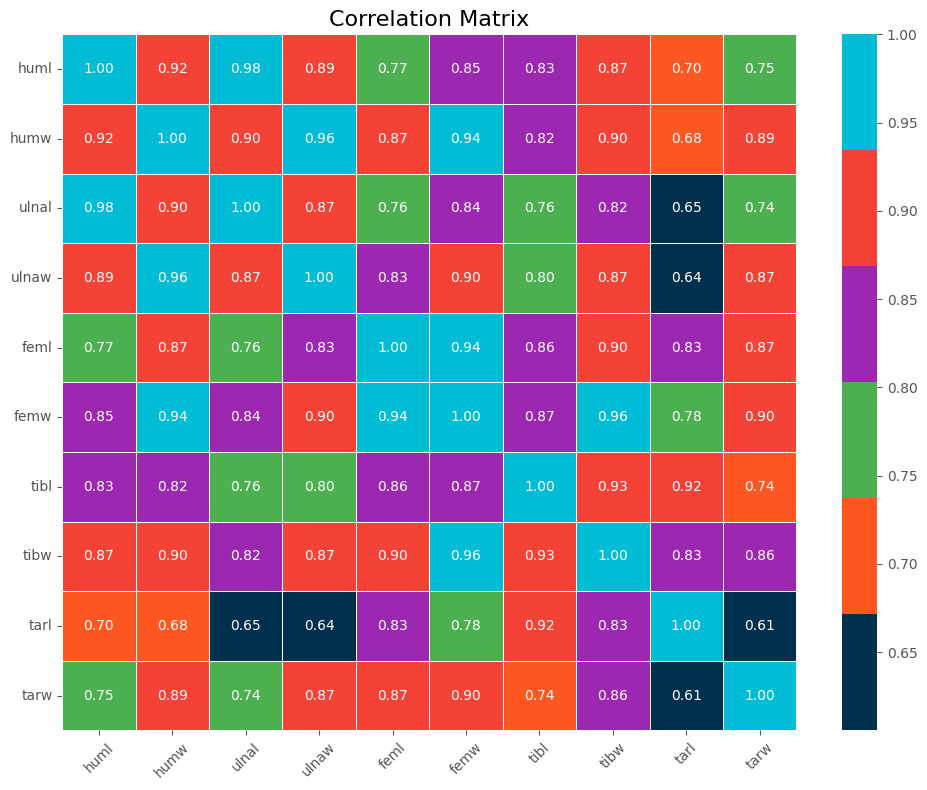

In [8]:
import matplotlib.colors as mcolors

# Calculate the correlation matrix
correlation_matrix = bird.corr(numeric_only=True)

# Define the colors
colors = ["#00304e", "#ff5722", "#4caf50", "#9c27b0", "#f44336", "#00bcd4"]

# Create a custom colormap using the defined colors
cmap = mcolors.ListedColormap(colors)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the correlation matrix using a heatmap with the custom colormap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, ax=ax)

# Set the title and adjust the font sizes
ax.set_title('Correlation Matrix', fontsize=16)
ax.tick_params(axis='both', labelsize=10)

# Rotate the tick labels for better visibility
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Add a color bar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

# Display the plot
plt.tight_layout()
plt.show()

**Scatter Plots:** Scatter plots are effective tools for visualizing the relationship between two continuous variables. By plotting one variable on the x-axis and another on the y-axis, we can observe the pattern of their distribution and identify any potential trends or outliers. Scatter plots help us understand the nature of the relationship between variables, such as whether it is linear, nonlinear, or exhibits any specific patterns. Additionally, scatter plots are useful for detecting outliers, clusters, or any other unusual data patterns.

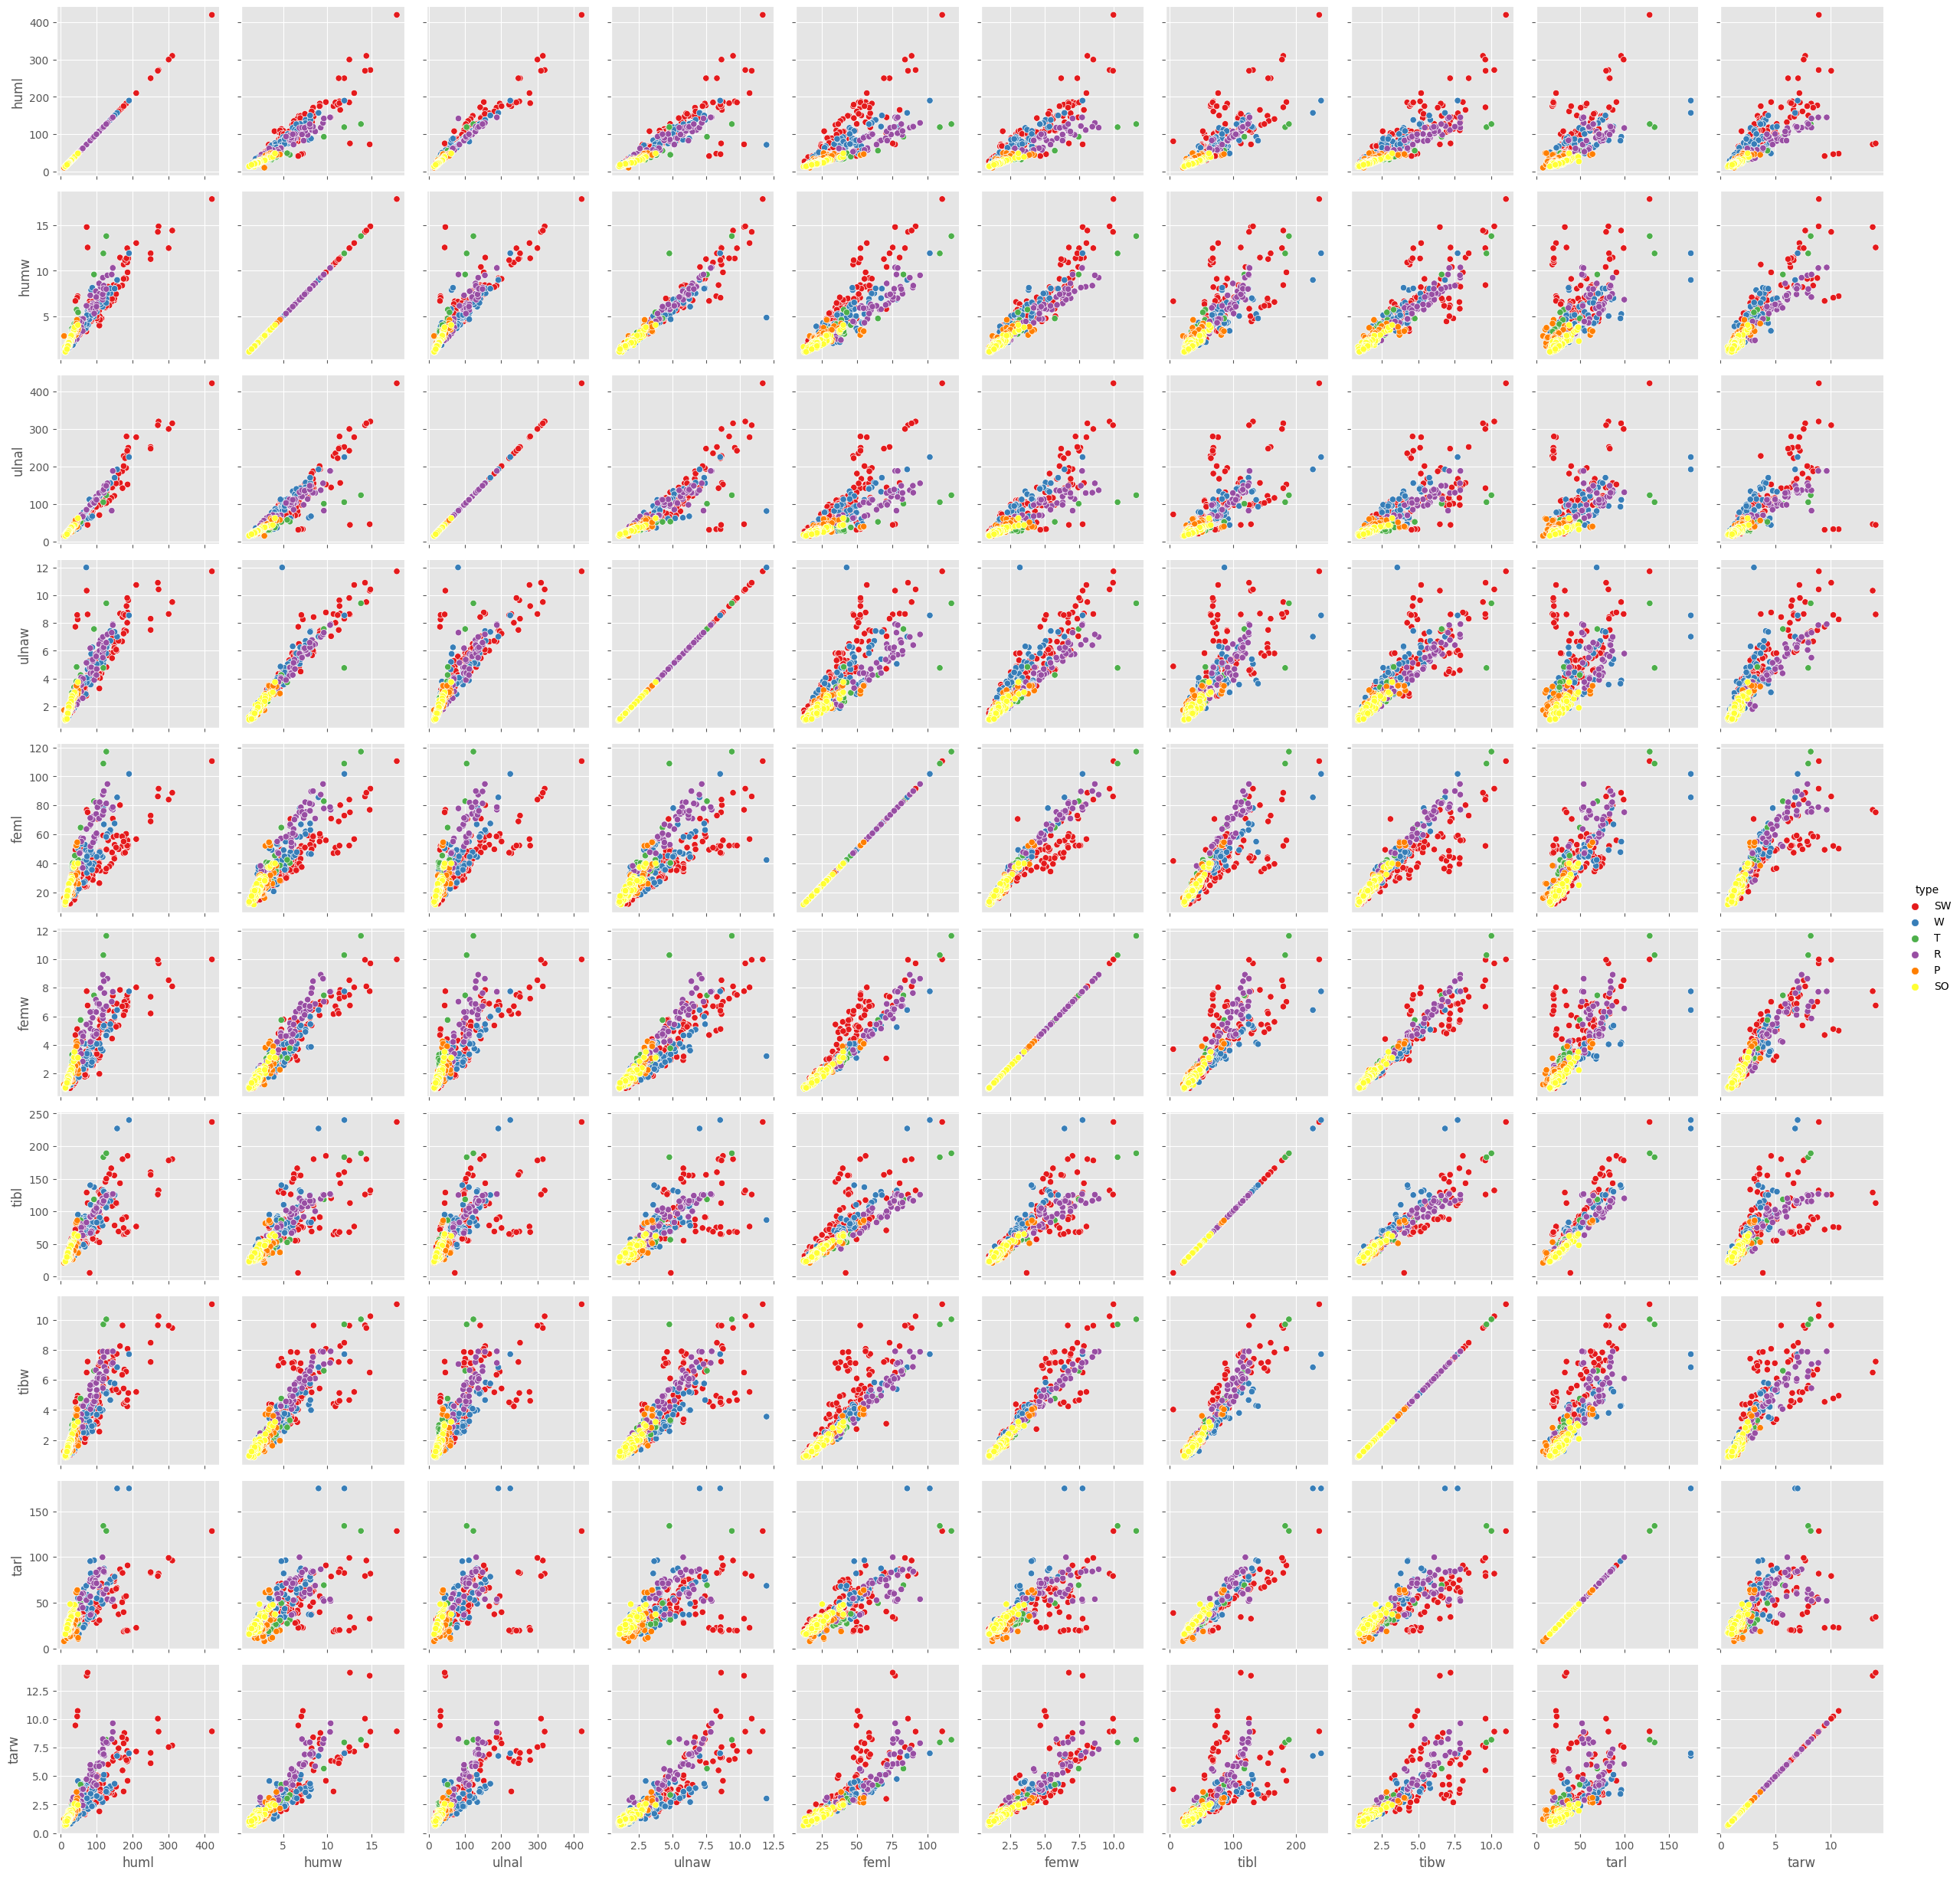

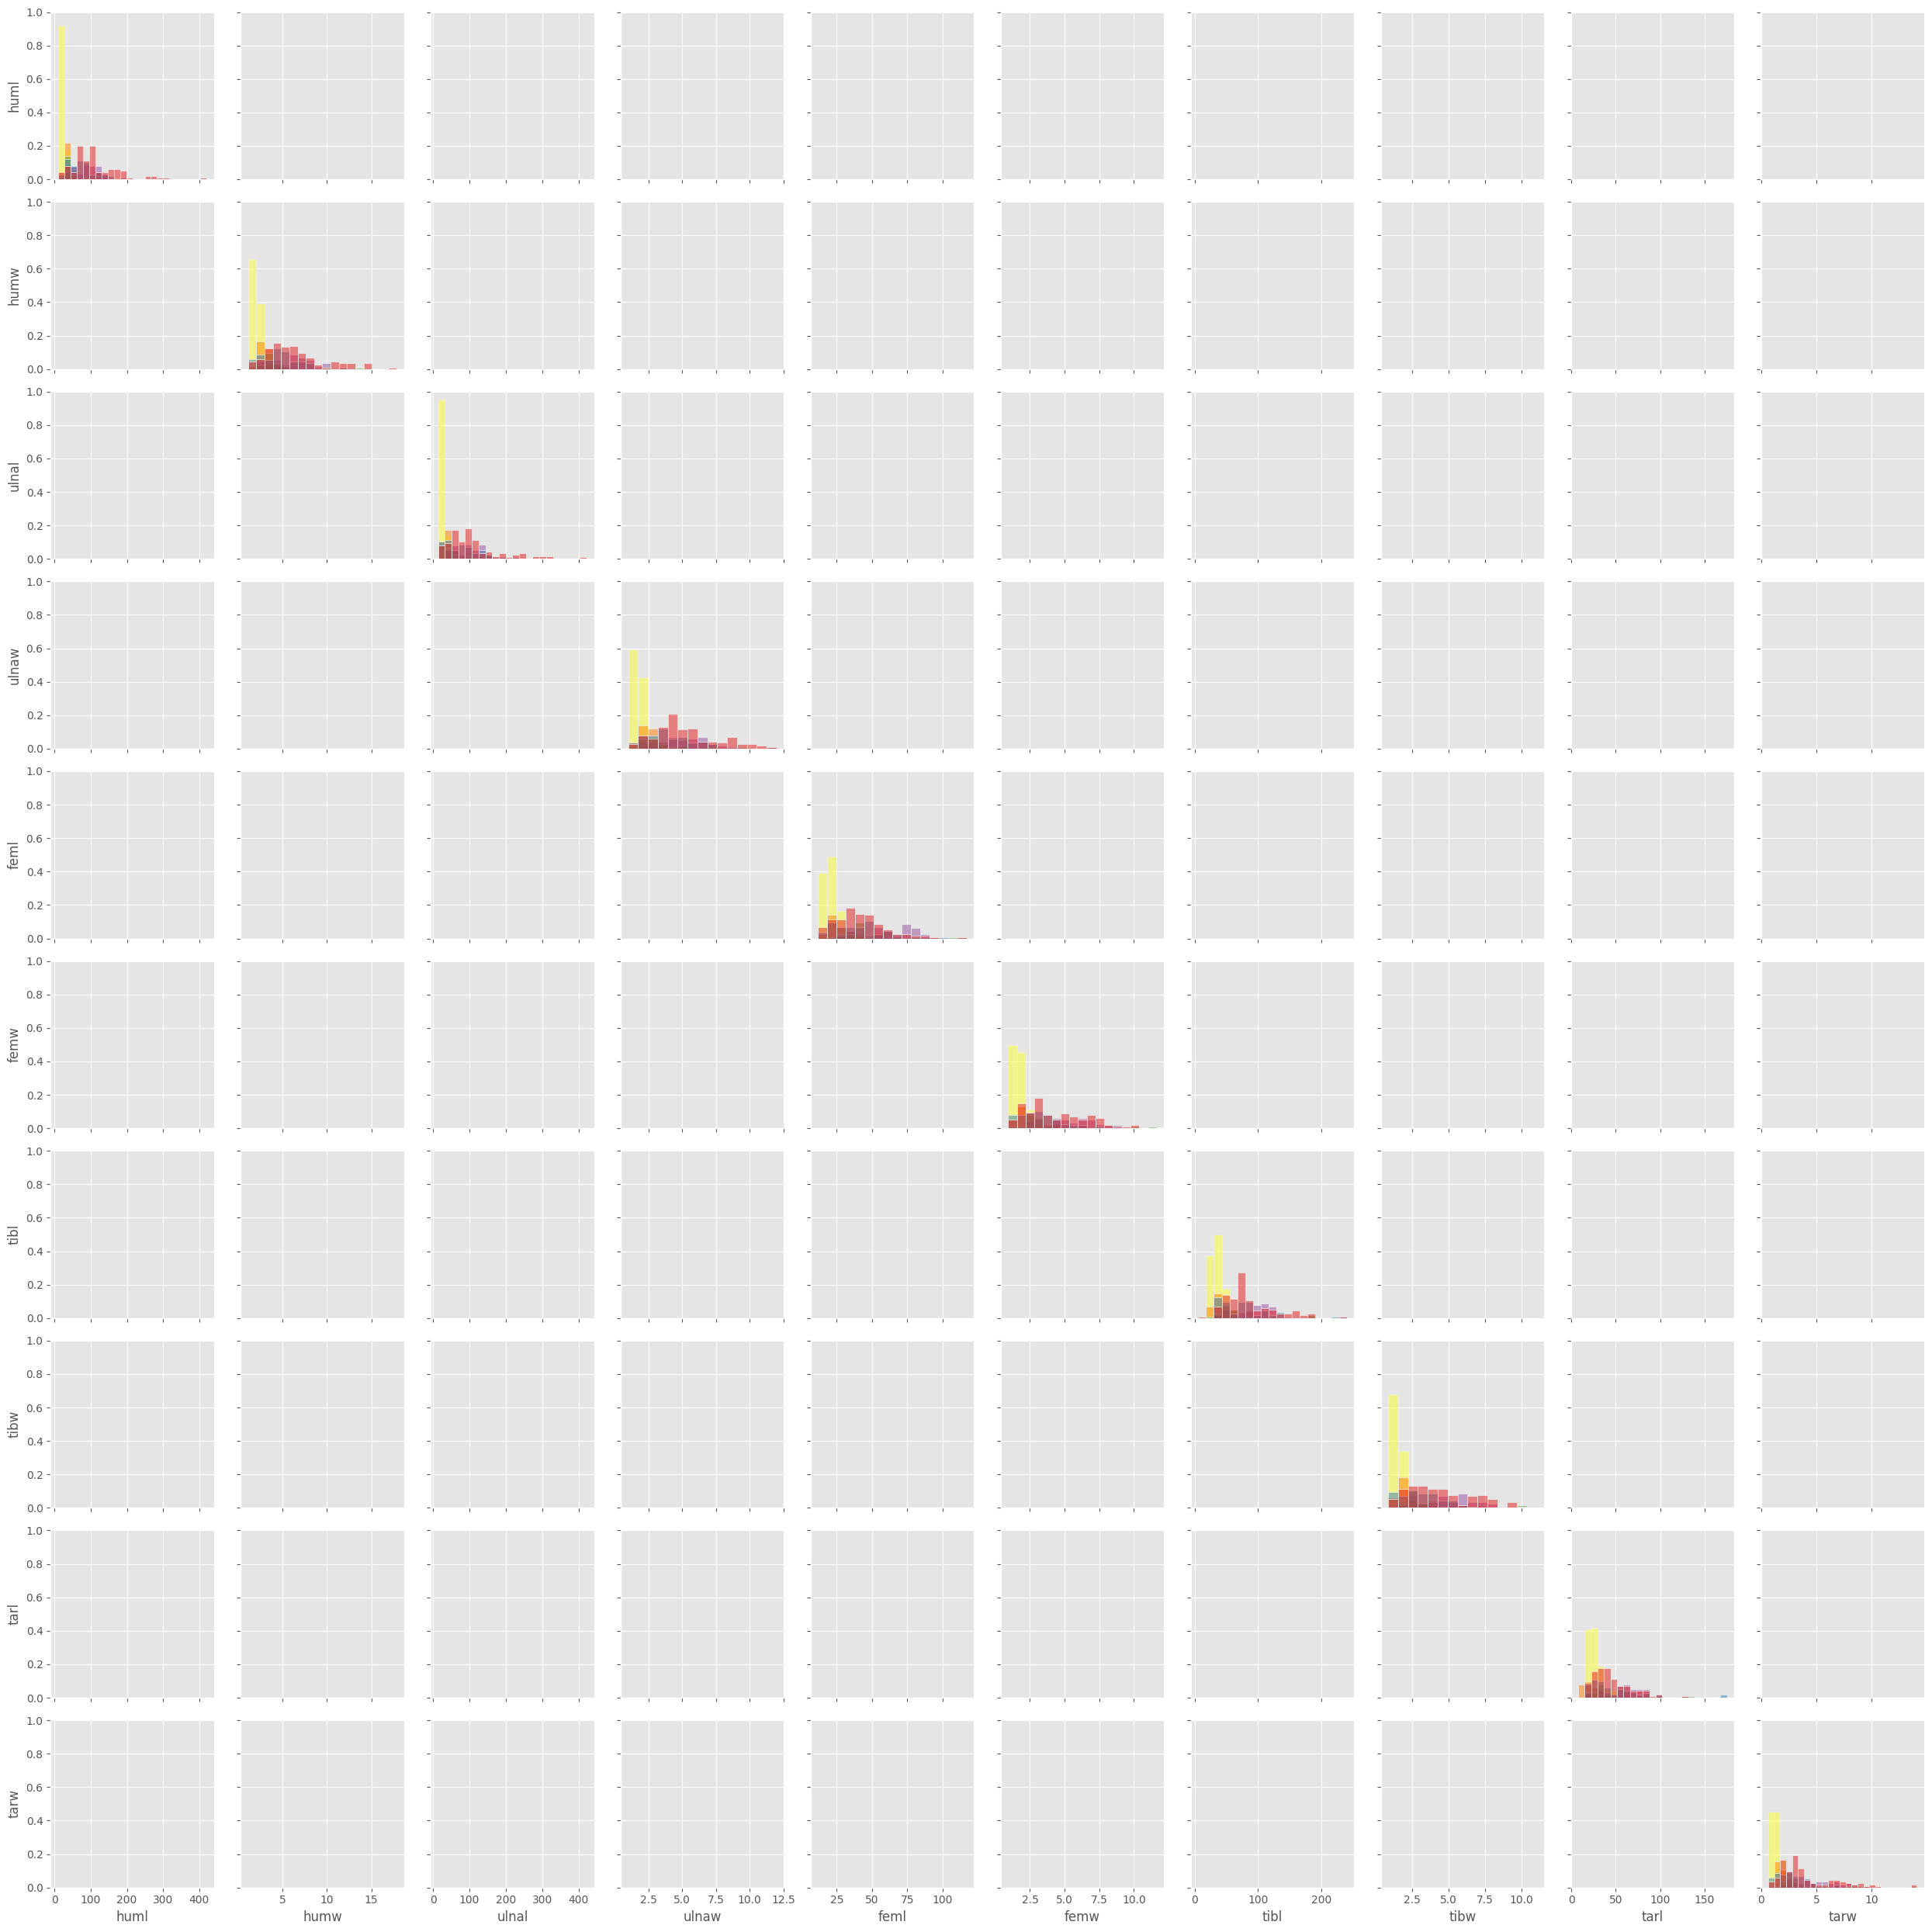

In [9]:
# Create a scatter plot matrix
scatterplot = sns.PairGrid(data=bird_raw, vars=feature_columns, hue="type", palette="Set1")
scatterplot.map(sns.scatterplot)
scatterplot.add_legend()

# Create histograms on the diagonal
histplot = sns.PairGrid(data=bird_raw, vars=feature_columns, hue="type", palette="Set1")
histplot.map_diag(sns.histplot)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

**Box Plots:** Box plots, also known as box-and-whisker plots, provide a summary of the distribution of a continuous variable. They display the minimum, maximum, median, and quartiles of the data, allowing us to visualize the range, central tendency, and spread of each feature. Box plots are especially helpful for detecting outliers and understanding the variability within each feature. By creating box plots for each feature, we can identify potential variations across different ecological groups or identify any patterns that may exist.

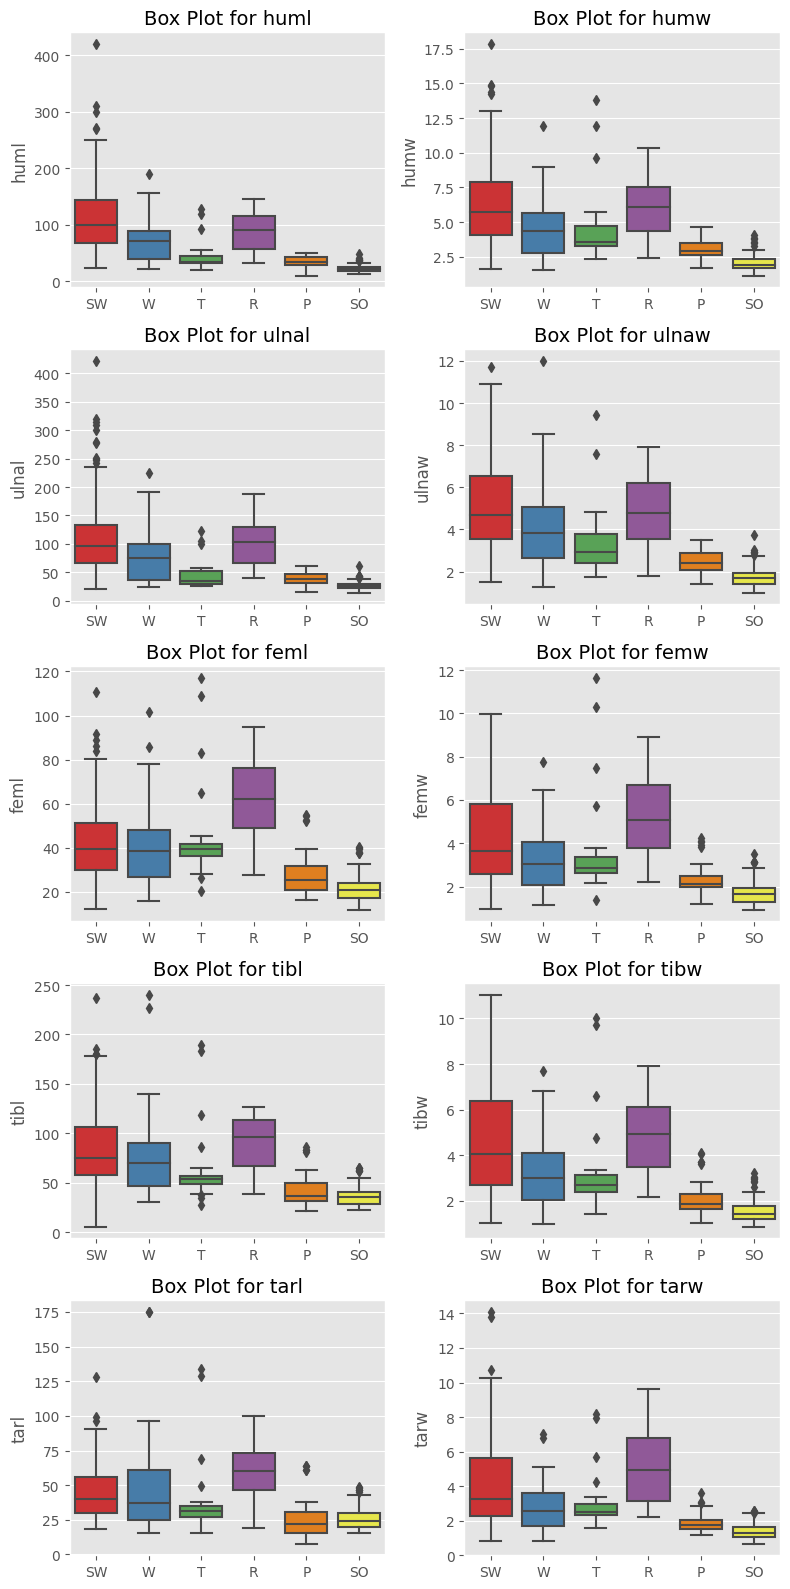

In [10]:
# Set up the figure and axes
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 16))

# Flatten the axes array
axes = axes.ravel()

# Create the box plots for each feature
for i, feature in enumerate(feature_columns):
    ax = axes[i]

    sns.boxplot(data=bird_raw, y=feature, x='type', ax=ax, palette='Set1')

    ax.set_xlabel("")
    ax.set_ylabel(feature, fontsize=12)
    ax.set_title("Box Plot for {}".format(feature), fontsize=14)
    ax.tick_params(axis='both', labelsize=10)

plt.tight_layout()
plt.show()

**Limb-Hind Ratio:** The limb-hind ratio is a derived feature that represents the ratio between the length of the limb bones (humerus, ulna, femur) and the hind limb bones (tibiotarsus, tarsometatarsus). This ratio provides insight into the relative proportions of the limb bones compared to the hind limb bones, which can be indicative of the bird's physical characteristics and locomotion patterns. Analyzing the limb-hind ratio can help us identify any distinct patterns or differences across ecological groups.

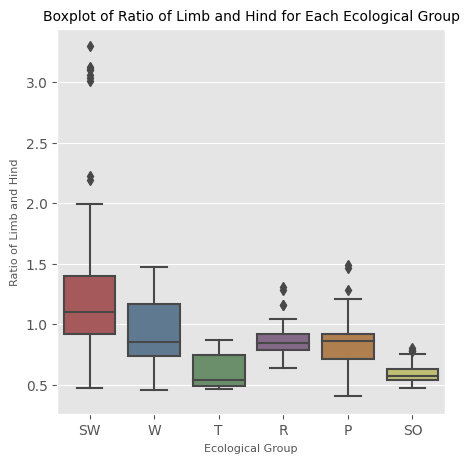

In [11]:
limb_hind_ratio = pd.DataFrame(
    {"ratio": (bird_raw.huml + bird_raw.ulnal) / (bird_raw.feml + bird_raw.tibl + bird_raw.tarl),
     "type": bird_raw.type})

_, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
sns.boxplot(
    data=limb_hind_ratio,
    y="ratio",
    x="type",
    palette=sns.color_palette("Set1", n_colors=6, desat=.5)
)

ax.set_xlabel("Ecological Group", fontsize=8)
ax.set_ylabel("Ratio of Limb and Hind", fontsize=8)
_ = ax.set_title("Boxplot of Ratio of Limb and Hind for Each Ecological Group", fontsize=10)

# 3. Preprocessing


In this step, we prepared the dataset for model training. Here's why each preprocessing technique was employed:

**Missing Values:** We addressed missing values by dropping rows containing NaN values. Removing incomplete samples ensured that our models received clean and reliable data, preventing potential biases that missing values might introduce.

**Principal Component Analysis (PCA):** We applied PCA to reduce the dimensionality of the dataset. By transforming the bone measurements into a lower-dimensional space, PCA helped us capture the most important features while minimizing the risk of overfitting.

**Box Plot:** We created box plots for each bone dimension to identify any outliers that might adversely affect our models. Outliers can skew model predictions and compromise the overall accuracy, making it necessary to detect and handle them appropriately.

**Variance Ratio:** Calculating the variance ratio allowed us to assess the amount of variance explained by each principal component after applying PCA. This analysis aided in determining the optimal number of components to retain for maintaining an acceptable level of information while reducing dimensionality.

**Kernel Density Estimation (KDE) Plot:** We utilized KDE plots to visualize the distribution of bone measurements within each ecological group. This step was crucial for understanding the overlapping patterns and identifying potential challenges in distinguishing species with similar bone characteristics.

**Robust Features:** Based on the insights gained from the box plots, variance ratio, and KDE plots, we selected the most robust features. This selection process aimed to focus on the bone measurements that exhibited the most distinct and informative patterns across different avian species.

**Chi-Square (χ²) Test:** We employed the χ² test to examine the independence between the selected robust features and the target variable. This statistical analysis helped us confirm the relevance of the chosen features in differentiating avian species and justified their inclusion in the subsequent modeling stages.

In [12]:
bird.dropna(axis=0, how="any", inplace=True)

In [13]:
missing_values = bird.isna().sum()
print(missing_values)

id       0
huml     0
humw     0
ulnal    0
ulnaw    0
feml     0
femw     0
tibl     0
tibw     0
tarl     0
tarw     0
type     0
dtype: int64


In [14]:
from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA()

# Fit PCA on the features
pca.fit(bird[feature_columns])

# Calculate the explained variance ratios
explained_variance = pd.DataFrame(
    {
        "evr": pca.explained_variance_ratio_,
        "evrc": pca.explained_variance_ratio_.cumsum(),
    },
    index=pd.Index(["pc{:d}".format(i) for i in range(1, len(feature_columns) + 1)], name="principal components"),
)

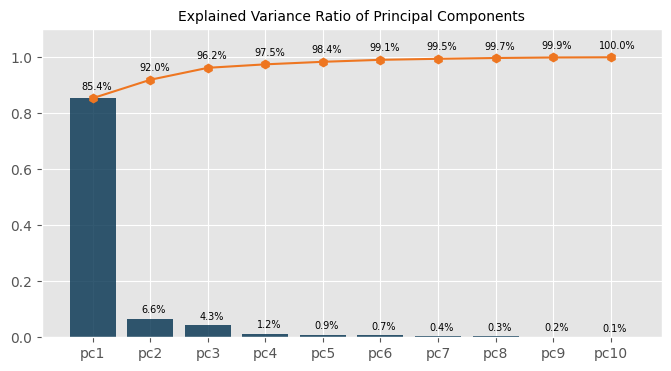

In [15]:
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the cumulative explained variance ratio as a line plot
ax.plot(explained_variance.index, explained_variance.evrc, color="#ee7621", linestyle="-", marker="h")

# Plot the explained variance ratio of each principal component as a bar plot
ax.bar(explained_variance.index, explained_variance.evr, color="#00304e", alpha=0.8, align="center")

# Set the title and adjust the font sizes
ax.set_title("Explained Variance Ratio of Principal Components", fontsize=10)

# Set the y-axis limits
ax.set_ylim([0.0, 1.1])

# Annotate the cumulative explained variance ratio on the line plot
for x, y in zip(np.arange(0, len(explained_variance.evrc)), explained_variance.evrc):
    ax.annotate("{:.1f}%".format(y * 100.0), xy=(x - 0.2, y + 0.03), fontsize=7)

# Annotate the explained variance ratio of each principal component on the bar plot
for x, y in zip(np.arange(1, len(explained_variance.evr)), explained_variance.evr[1:]):
    ax.annotate("{:.1f}%".format(y * 100.0), xy=(x - 0.15, y + 0.02), fontsize=7)

# Show the plot
plt.show()

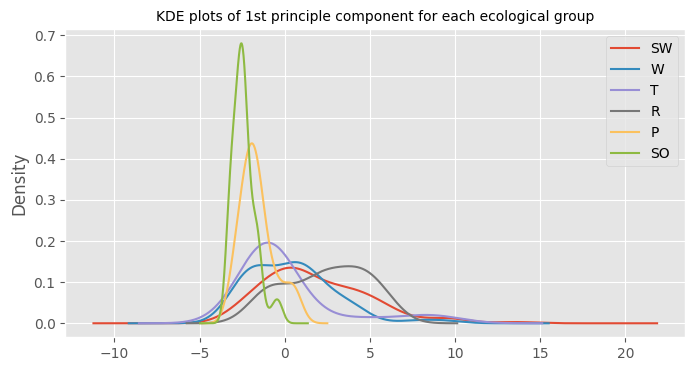

In [16]:
pcs = pca.transform(bird[feature_columns])
pc1 = pd.DataFrame({"pc1": pcs[:, 0], "ecological_group": bird.type})

fig, ax = plt.subplots(figsize=(8, 4))

for g in pc1.ecological_group.unique():
    tmp = pc1[pc1.ecological_group == g]["pc1"].to_frame()
    tmp.columns = [g]
    tmp.plot(kind="kde", ax=ax)

ax.set_title("KDE plots of 1st principle component for each ecological group", fontsize=10)

plt.show()

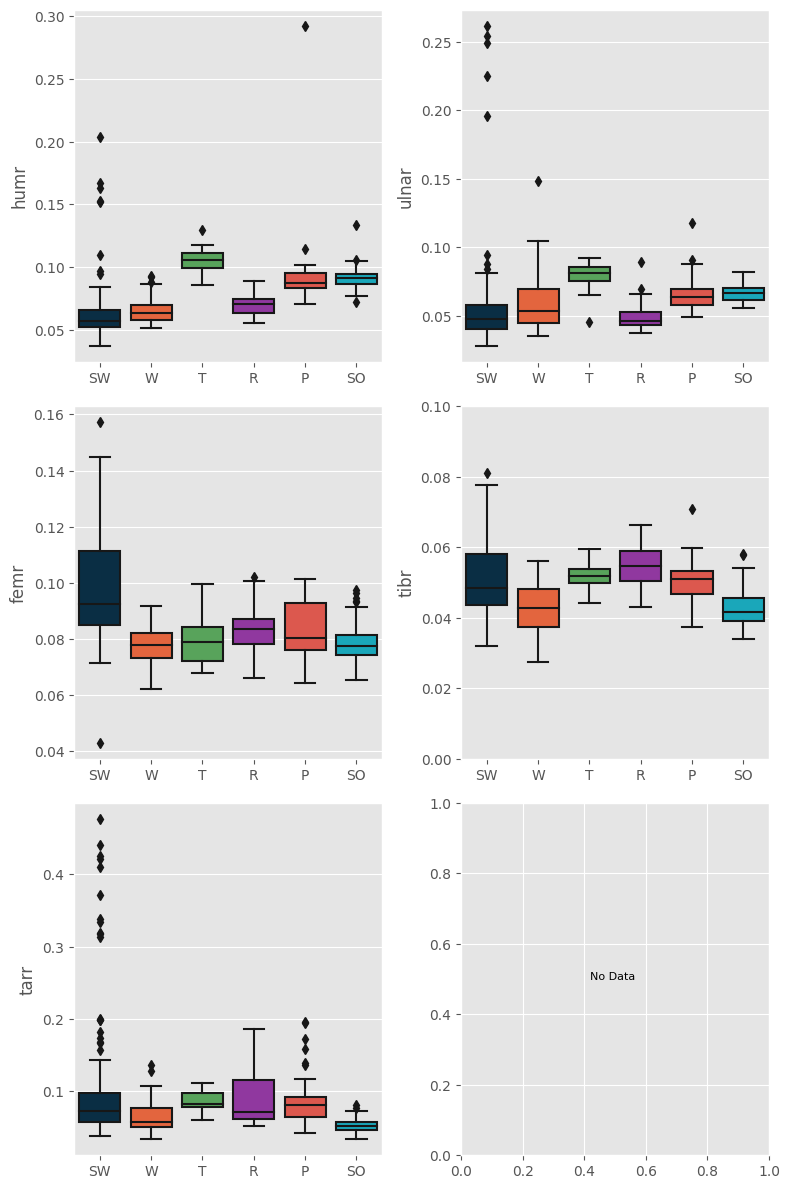

In [17]:
robust = pd.DataFrame({
    "humr": bird_raw.humw / bird_raw.huml,
    "ulnar": bird_raw.ulnaw / bird_raw.ulnal,
    "femr": bird_raw.femw / bird_raw.feml,
    "tibr": bird_raw.tibw / bird_raw.tibl,
    "tarr": bird_raw.tarw / bird_raw.tarl,
    "type": bird_raw.type
})

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))

colors = ["#00304e", "#ff5722", "#4caf50", "#9c27b0", "#f44336", "#00bcd4"]

for f, ax in zip(["humr", "ulnar", "femr", "tibr", "tarr"], axes.ravel()):
    sns.boxplot(
        data=robust,
        y=f,
        x='type',
        ax=ax,
        palette=colors
    )

    ax.set_xlabel("")

    if f == "tibr":
        ax.set_ylim((0.0, 0.1))

axes[2, 1].annotate("No Data", xy=(.42, .5), fontsize=8)

plt.tight_layout()
plt.show()


In [18]:
from sklearn.preprocessing import StandardScaler

# Concatenate the dataframes
bird_extended = pd.concat([bird_raw, robust[["humr", "ulnar", "femr", "tibr", "tarr"]], limb_hind_ratio["ratio"]], axis=1)

# Define the extended feature columns
feature_columns_extended = ["huml", "humw", "ulnal", "ulnaw", "feml", "femw", "tibl", "tibw", "tarl", "tarw", "humr", "ulnar", "femr", "tibr", "tarr", "ratio"]

# Perform feature scaling
scaler = StandardScaler()
bird_extended[feature_columns_extended] = scaler.fit_transform(bird_extended[feature_columns_extended])


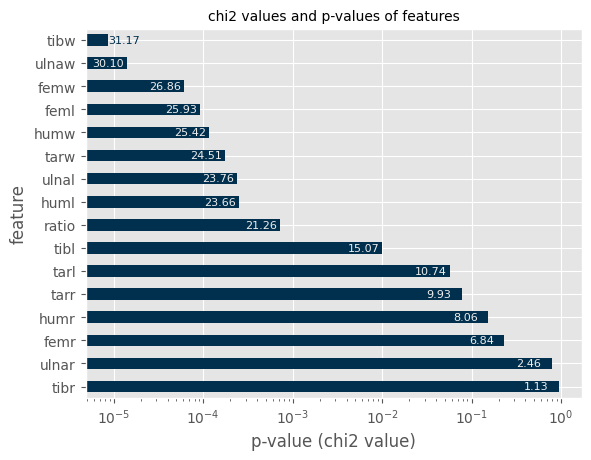

In [29]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

# Drop rows with missing values
bird_extended_no_missing = bird_extended.dropna()

# Scale the features to [0, 1]
scaler = MinMaxScaler()
bird_extended_scaled = scaler.fit_transform(bird_extended_no_missing[feature_columns_extended])

# Perform chi-square test
chi2_result = chi2(bird_extended_scaled, bird_extended_no_missing.type)

# Create a DataFrame to store the chi-square statistics and p-values
chi2_result = pd.DataFrame({"feature": feature_columns_extended, "chi2_statics": chi2_result[0], "p_values": chi2_result[1]})

# Sort the DataFrame by p-values in descending order
chi2_result.sort_values(by="p_values", ascending=False, inplace=True)

# Set the feature column as the index
chi2_result.set_index(keys="feature", inplace=True)

# Plot the p-values
ax = chi2_result["p_values"].plot(kind="barh", logx=True, color="#00304e")

# Add annotations for chi-square statistics and p-values
ax.annotate("{:3.2f}".format(chi2_result.chi2_statics[chi2_result.shape[0] - 1]), xy=(chi2_result.p_values[chi2_result.shape[0] - 1], len(feature_columns_extended) - 1), xytext=(0, -3), textcoords="offset pixels", fontsize=8, color="#00304e")
for y, x, c in zip(np.arange(0, len(feature_columns_extended) - 1), chi2_result.p_values[:-1], chi2_result.chi2_statics[:-1]):
    ax.annotate("{:3.2f}".format(c), xy=(x, y), xytext=(-35, -3), textcoords="offset pixels", fontsize=8, color="#eeeeee")

# Set the x-axis label and title
ax.set_xlabel("p-value (chi2 value)")
_ = ax.set_title("chi2 values and p-values of features", fontsize=10)


# 4. Data Balancing
Recognizing the potential impact of class imbalance on model performance, we employed the Synthetic Minority Over-sampling Technique (SMOTE) to balance the dataset. SMOTE generated synthetic samples for the minority classes, ensuring a more equitable representation of all ecological groups. This step was crucial to prevent the models from being biased towards the majority class and to improve the accuracy of species classification across all groups.

In [30]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = bird_extended_no_missing[feature_columns_extended]
y = bird_extended_no_missing["type"]

# Initialize the SMOTE algorithm
smote = SMOTE()

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)


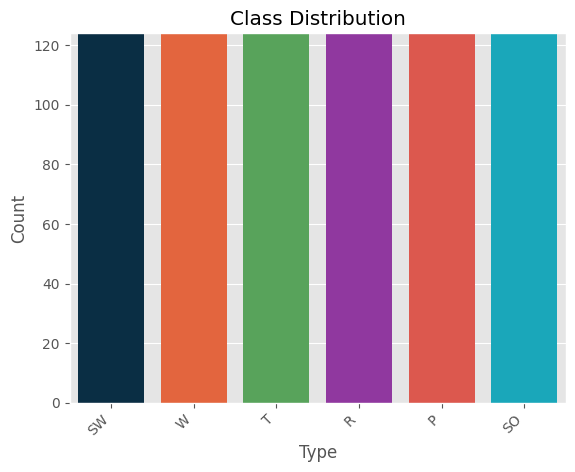

In [31]:
import seaborn as sns

# Combine the resampled features and target variable into a DataFrame
resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=feature_columns_extended),
                            pd.DataFrame(y_resampled, columns=["type"])], axis=1)

# Define the color palette
colors = ["#00304e", "#ff5722", "#4caf50", "#9c27b0", "#f44336", "#00bcd4"]

# Plot the class distribution
sns.countplot(x="type", data=resampled_data, palette=colors)
plt.title("Class Distribution")
plt.xlabel("Type")
plt.ylabel("Count")

# Set circular shape for the bars
ax = plt.gca()
ax.set_ylim(0, resampled_data["type"].value_counts().max())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show the plot
plt.show()

# 5. Model Architecture Choice
In this step, we selected three machine learning algorithms for avian species classification: Random Forest, and Support Vector Classifier (SVC). Here's why these choices were made:


Random Forest: The Random Forest algorithm was selected for its ability to capture intricate patterns and feature interactions. By leveraging an ensemble of decision trees, Random Forest could reveal the importance of each bone dimension, aiding in the identification of key factors driving avian species classification.

Support Vector Classifier (SVC): SVC was chosen for its effectiveness in discerning subtle differences among avian species. Its ability to maximize the margin between classes, coupled with its high accuracy, made it a promising choice for our task. The classification report provided by SVC, including precision, recall, and F1-score, allowed us to assess the performance of the model across different ecological groups.

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(resampled_data[feature_columns], resampled_data["type"], test_size=0.2, random_state=42)

SVM Accuracy: 0.9731543624161074
SVM Classification Report:
              precision    recall  f1-score   support

           P       1.00      1.00      1.00        22
           R       0.96      1.00      0.98        25
          SO       0.94      1.00      0.97        31
          SW       1.00      0.90      0.95        29
           T       1.00      0.95      0.98        22
           W       0.95      1.00      0.98        20

    accuracy                           0.97       149
   macro avg       0.98      0.98      0.97       149
weighted avg       0.97      0.97      0.97       149



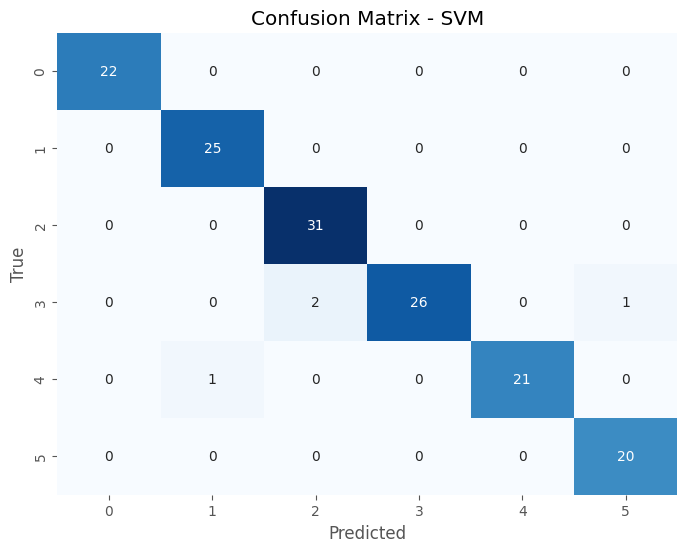

In [35]:
# SVM classifier
svm_classifier = SVC(random_state=42)
svm_param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale']}
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=3)
svm_grid_search.fit(X_train, y_train)
svm_predictions = svm_grid_search.predict(X_test)

# Evaluate the SVM classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions)
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)

# Print SVM results
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:")
print(svm_classification_report)

# Plot SVM confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

Random Forest Accuracy: 0.8993288590604027
Random Forest Classification Report:
              precision    recall  f1-score   support

           P       0.91      0.95      0.93        22
           R       0.89      1.00      0.94        25
          SO       0.94      1.00      0.97        31
          SW       0.95      0.69      0.80        29
           T       1.00      0.86      0.93        22
           W       0.72      0.90      0.80        20

    accuracy                           0.90       149
   macro avg       0.90      0.90      0.90       149
weighted avg       0.91      0.90      0.90       149



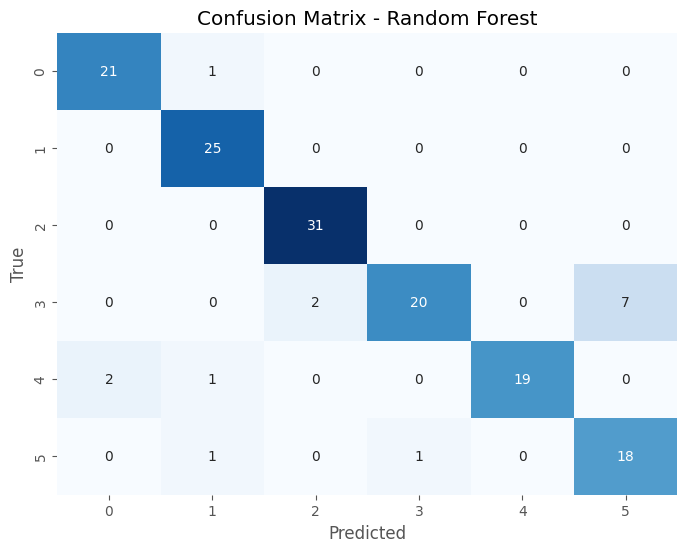

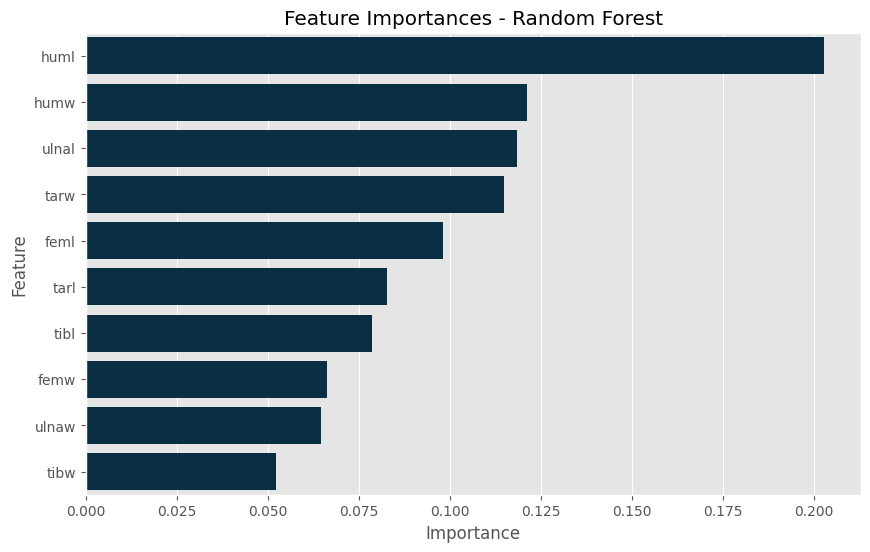

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set
rf_predictions = best_rf_classifier.predict(X_test)

# Evaluate the Random Forest classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_classification_report = classification_report(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

# Print Random Forest results
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:")
print(rf_classification_report)

# Plot Random Forest confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Get feature importances from the best model
feature_importances = best_rf_classifier.feature_importances_

# Create a DataFrame to store feature importances
importance_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color="#00304e")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances - Random Forest')
plt.show()


# **Discussion**
In the analysis of the avian bone dataset, we performed comprehensive Exploratory Data Analysis (EDA) and preprocessing steps to prepare the data for machine learning modeling. Through EDA, we gained valuable insights into the dataset, identified potential patterns, and understood the relationships between variables.

During EDA, we examined the correlation matrix, scatter plots, and box plots for each feature. The correlation matrix allowed us to assess the linear relationships between variables, providing insights into potential dependencies and associations. Scatter plots provided visual representations of the relationships between two continuous variables, helping us identify trends, patterns, and outliers. Box plots summarized the distribution of each continuous variable, enabling us to understand the range, central tendency, and variability within the features.

Based on the EDA findings, we proceeded with the preprocessing steps. We addressed missing values using imputation techniques, ensuring that valuable data was retained while maintaining the integrity of the dataset. Additionally, we employed Principal Component Analysis (PCA) to reduce the dimensionality of the dataset, capturing the most important features that explain the majority of the variance.

To tackle the issue of class imbalance, we employed the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE allowed us to create synthetic samples for the minority class, thus balancing the dataset and mitigating the potential bias towards the majority class.

With the preprocessed data, we moved on to selecting and training machine learning models. We chose to employ Random Forest, and Support Vector Machine (SVM) algorithms based on the characteristics of the dataset and the nature of the classification task. Random Forest demonstrated an accuracy of 0.90, with respectable precision, recall, and F1-scores for each class. SVM outperformed with an accuracy of 0.97, exhibiting high precision, recall, and F1-scores for all classes.

The Random Forest model yielded a macro-average F1-score of 0.90, indicating good overall performance in classifying the avian bone species. SVM, on the other hand, achieved a macro-average F1-score of 0.97, showcasing excellent performance and robustness in distinguishing between different bird species.

It is important to note that the choice of models was influenced by the characteristics of the dataset and the insights gained from EDA. We selected models that are suitable for nonlinear relationships, can handle imbalanced data, and exhibit robustness to outliers. The performance metrics provided a comprehensive evaluation of the models, considering precision, recall, F1-scores, and overall accuracy.

In conclusion, our analysis of the avian bone dataset, supported by thorough EDA and preprocessing, demonstrated the efficacy of machine learning models in species classification. The SVM model exhibited superior performance, achieving high accuracy and F1-scores across all classes. These findings suggest the potential application of machine learning algorithms in identifying avian species based on bone measurements. However, further research and validation are warranted to ensure the generalizability and robustness of the models in real-world scenarios.